# Chapter 3. Linear Regression - Lab

- [3.6 Lab: Linear regression](#Lab:-Linear-regression)
    - [Is there a relationship between the median house price and the predictors?](#Is-there-a-relationship-between-the-median-house-price-and-the-predictors?)
    - [How strong is the relationship?](#How-strong-is-the-relationship?)
    - [Which predictors are associated with the outcome?](#Which-predictors-are-associated-with-the-outcome?)
    - [How large is the association between the predictors and the outcome?](#How-large-is-the-association-between-the-predictors-and-the-outcome?)
    - [How accurately can we predict the median house price?](#How-accurately-can-we-predict-the-median-house-price?)
    - [Is the relationship linear?](#Is-the-relationship-linear?)

## Lab: Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from patsy import dmatrices

In [2]:
boston_df = pd.read_csv('../data/boston.csv', index_col=0)

In [3]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [5]:
boston_df.describe().applymap('{:3.2f}'.format)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [6]:
predictors = ' + '.join(boston_df.drop('medv', axis=1).columns)
print(predictors.split(' + '))

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [7]:
y, X = dmatrices('medv ~ '+str(predictors), return_type='dataframe', data=boston_df)

## Is there a relationship between the median house price and the predictors?

Let's try to answer this question concerning the _Boston_ data set by calculating the linear regression which we display in the results below.

In [8]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        14:57:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Due to the very low $p$-value of the $F$-statistic, we can conclude that there is a clear relationship between the median house prices and the predictors. However as note 2 suggests, multicollinearity or other numerical problems may be present in the data.

## How strong is the relationship?

The $R^2$ is 0.741, indicating that the model can explain over 74% of the variance in the data.

## Which predictors are associated with the outcome?

When observing the regression results table, all predictors except `indus` and `age` have a $p$-value below 0.01, which makes them highly significant. You can see that the confidence interval for `indus` and `age` are consistent with zero, which is further proof that there is no association of these predictors with the median house price.

## How large is the association between the predictors and the outcome?

Let's calculate the _variance inflation factor (VIF)_ which shows collinearity between predictors. We can do this by using the `statsmodels.stats.outliers_influence.variance_inflation_factor` method in statsmodels.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for index, colname in enumerate(X.columns):
    print(f'{colname:<10} {round(variance_inflation_factor(X, index), 3)}')

Intercept  585.265
crim       1.792
zn         2.299
indus      3.992
chas       1.074
nox        4.394
rm         1.934
age        3.101
dis        3.956
rad        7.484
tax        9.009
ptratio    1.799
black      1.349
lstat      2.941


The fact that the predictors `indus` and `age` have low significance isn't due to _collinearity_. `Intercept` has a high value of collinearity, but it was added to the matrix `X` by design so it shouldn't affect the VIF results of the other predictors.

Collinearity may be present due to the `rad` and `tax` predictors, following the rule of thumb that values above 5 may indicate the presence of collinearity in the predictors. Let's calculate a regression model between the two variables.

In [10]:
y_t, X_t = dmatrices('tax ~ rad', return_type='dataframe', data=boston_df)
results_t = sm.OLS(y_t, X_t).fit()
print(results_t.summary())

                            OLS Regression Results                            
Dep. Variable:                    tax   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2435.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          4.13e-195
Time:                        14:57:46   Log-Likelihood:                -2865.7
No. Observations:                 506   AIC:                             5735.
Df Residuals:                     504   BIC:                             5744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    239.9927      4.612     52.037      0.0

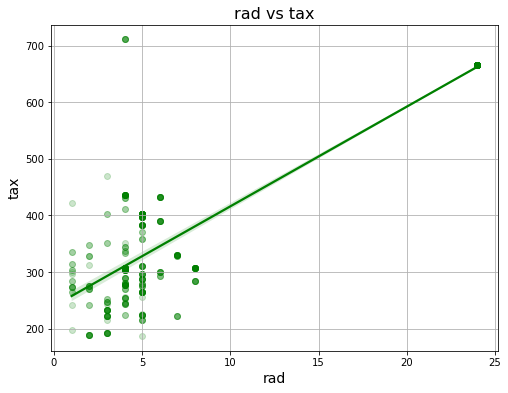

In [11]:
fig, axes = plt.subplots(figsize=(8, 6))
sb.regplot(x='rad', y='tax', data=X, ci=95, color='green', scatter_kws={'alpha': 0.2}, ax=axes)
axes.set_xlabel('rad', fontsize=14)
axes.set_ylabel('tax', fontsize=14)
axes.set_title('rad vs tax', fontsize=16)
plt.grid(True);

If we compute Student's $t$-test between each predictor (excluding the intercept) and the median house price, we find high significance between each predictor and the outcome.

In [12]:
columns = X.columns[1:]
for colname in columns:
    tmp_results = sm.OLS(y, X.loc[:, colname]).fit()
    print(f'{colname:<10} {round(tmp_results.tvalues.values[0], 3):<10} {tmp_results.pvalues.values[0]}')

crim       5.16       3.555543923736217e-07
zn         13.98      8.878239948464716e-38
indus      21.595     9.550829647121718e-74
chas       7.259      1.4829062489644311e-12
nox        40.319     5.5328434496052754e-160
rm         67.93      3.743758187855038e-256
age        30.25      1.8485504970030306e-115
dis        37.149     1.5152578191283432e-146
rad        16.316     2.2463761154127937e-48
tax        28.818     1.0262258453241314e-108
ptratio    45.698     1.5103603110685885e-181
black      56.105     3.98926958155879e-219
lstat      20.271     2.7141948125197922e-67


## How accurately can we predict the median house price?

The residual standard error using statsmodels is:

In [13]:
print(f'Residual standard error: {round(np.sqrt(results.mse_resid), 3)}')

Residual standard error: 4.745


The residual standard error can be alternatively derived from the calculation below.

In [14]:
print(f'Residual standard error: {round(np.sqrt(((y.values.ravel()-results.fittedvalues)**2).sum()/(y.shape[0]-14)), 3)}')

Residual standard error: 4.745


In [15]:
print(f'Average median house price: {round(np.mean(y.values), 3)}')

Average median house price: 22.533


In [16]:
print(f'Percentage error of the mean: {round(100*(np.sqrt(results.mse_resid)/np.mean(y.values)), 2)}%')

Percentage error of the mean: 21.06%


Due to the relatively high percentage error on the mean of just over 21%, the prediction accuracy of the mean suffers from a wide error range which limits its prediction power.

## Is the relationship linear?

Let's calculate the residuals plot to observe any pattern in the data.

In [17]:
resid = y.values.ravel()-results.fittedvalues

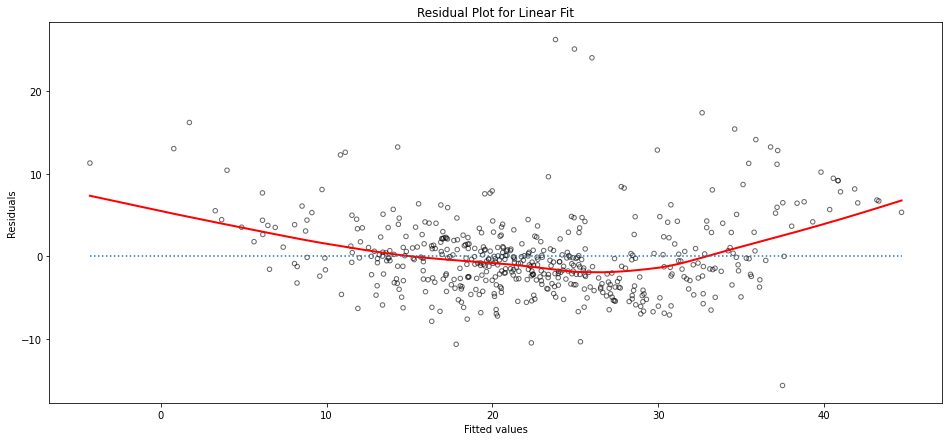

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(16, 7))
sb.regplot(x=results.fittedvalues, y=resid, ci=None, lowess=True, \
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 's':20, 'alpha':0.6}, \
           line_kws={'lw': 2, 'color':'r'}, ax=axes)
axes.hlines(0, axes.xaxis.get_data_interval()[0], axes.xaxis.get_data_interval()[1], linestyles=':')
axes.set_xlabel('Fitted values')
axes.set_ylabel('Residuals')
axes.set_title('Residual Plot for Linear Fit');

Clearly there is a decreasing pattern in the data!